In [4]:
# !pip install python-pptx

In [395]:
from pptx import Presentation
import pandas as pd
import matplotlib.pyplot as plt
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.text import MSO_ANCHOR, MSO_AUTO_SIZE
from pptx.dml.color import RGBColor
import os, io

In [16]:
tdf = pd.read_csv("C:\\Users\\Admin\\Downloads\\automate-powerpoint-main\\automate-powerpoint-main\\volumes per day.csv")
tdf.head(2)

,Unnamed: 0,DATE,WEEK,DAY,ORDERS,LINES,PCS,SKU,CITIES
0,0,2017-01-02,WEEK-1,MON,776,1367,1595.0,487,174
1,1,2017-01-03,WEEK-1,TUE,902,1550,1861.0,547,188


In [179]:
summDF = tdf.describe()
summDF

,Unnamed: 0,ORDERS,LINES,PCS,SKU,CITIES
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,14.500000,1062.466667,2040.966667,2385.600000,534.70000,211.566667
std,8.803408,414.971103,794.702394,951.366516,111.64017,39.510525
min,0.000000,278.000000,550.000000,610.000000,243.00000,123.000000
25%,7.250000,790.500000,1557.000000,1825.000000,472.50000,189.000000
50%,14.500000,1022.000000,1966.000000,2334.500000,540.00000,207.500000
75%,21.750000,1431.750000,2698.500000,3126.750000,618.75000,248.250000
max,29.000000,1921.000000,3479.000000,4188.000000,694.00000,279.000000


In [261]:
outPath = "E:/pyDev/output/"

## Template slides

In [557]:
prs = Presentation(outPath+"template.pptx")

# 256: topic
# 257: intro
# 258: data_summary
# 259: pdp_plot
# 260: feature_imp
# 261: model_validation
# 262: thank_you


## Add model introduction

In [558]:
intro_slide = prs.slides[1]

In [559]:
## Limit to 200 words

intro_text = """
This article is a high-level and beginner-friendly introduction to machine learning models.
Some basic knowledge of linear algebra, geometry, or statistics may be helpful, although not required; this article does not contain any mathematical implementation details and is written for readers newer to or unfamiliar with machine learning.
We start by explaining what an algorithm is: a machine learning model is a type of algorithm, so understanding the concept of an algorithm is fundamental to understanding what a model actually is.
This article is a high-level and beginner-friendly introduction to machine learning models.
Some basic knowledge of linear algebra, geometry, or statistics may be helpful, although not required; this article does not contain any mathematical implementation details and is written for readers newer to or unfamiliar with machine learning.
We start by explaining what an algorithm is: a machine learning model is a type of algorithm, so understanding the concept of an algorithm is fundamental to understanding what a model actually is.
This article is a high-level and beginner-friendly introduction to machine learning models.
Some basic knowledge of linear algebra, geometry, or statistics may be helpful, although not required; this article does not contain any mathematical implementation details and is written for readers newer to or unfamiliar with machine learning.
We start by explaining what an algorithm is: a machine learning model is a type of algorithm, so understanding the concept of an algorithm is fundamental to understanding what a model actually is.
This article is a high-level and beginner-friendly introduction to machine learning models.
"""

print(len(intro_text.split()), "words found.")

255 words found.


In [560]:
left = Inches(0.75)
top = Inches(1.6)
width = Inches(9)
height = Inches(2)

txBox = intro_slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.word_wrap = True

p = tf.paragraphs[0]
run = p.add_run()

run.text = str(intro_text)

p.font.size = Pt(15)

## Add data summary stats

In [561]:
data_stats_summry = prs.slides[2]

In [562]:
def fillTable(df, tbl):
    
    colNames = list(df.columns)
    
    for Ci in range(df.shape[1]):
        tbl.cell(0,Ci).text = str(colNames[Ci])
        tbl.cell(0,Ci).text_frame.auto_size = MSO_AUTO_SIZE.SHAPE_TO_FIT_TEXT
#         tbl.cell(0,Ci).fill.solid()
#         tbl.cell(0,Ci).fill.fore_color.rgb = RGBColor(255, 255, 255)

    
    for Ri in range(df.shape[0]):
        for Ci in range(df.shape[1]):
            tbl.cell(Ri+1,Ci).text = str(round(df.iloc[Ri,Ci],4))
            tbl.cell(Ri+1,Ci).text_frame.auto_size = MSO_AUTO_SIZE.SHAPE_TO_FIT_TEXT
#             tbl.cell(Ri,Ci).fill.solid()
#             tbl.cell(Ri,Ci).fill.fore_color.rgb = RGBColor(255, 255, 255)

    return tbl

In [563]:
summDF

,Unnamed: 0,ORDERS,LINES,PCS,SKU,CITIES
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,14.500000,1062.466667,2040.966667,2385.600000,534.70000,211.566667
std,8.803408,414.971103,794.702394,951.366516,111.64017,39.510525
min,0.000000,278.000000,550.000000,610.000000,243.00000,123.000000
25%,7.250000,790.500000,1557.000000,1825.000000,472.50000,189.000000
50%,14.500000,1022.000000,1966.000000,2334.500000,540.00000,207.500000
75%,21.750000,1431.750000,2698.500000,3126.750000,618.75000,248.250000
max,29.000000,1921.000000,3479.000000,4188.000000,694.00000,279.000000


In [564]:
left, top, width, height = Inches(1), Inches(2), Inches(8), Inches(1.5)
tabRc, tabCc = summDF.shape[0]+1, summDF.shape[1]
shape = data_stats_summry.shapes.add_table(tabRc, tabCc, left, top, width, height)
table = shape.table
table = fillTable(summDF, table)

## PDP Plots

In [565]:
pdp_slide = prs.slides[3]

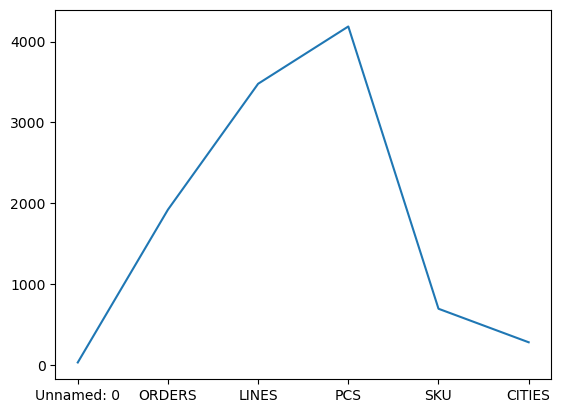

In [566]:
plt.plot(summDF.iloc[i])
plt.savefig('tmp_plt.png', bbox_inches='tight')

In [567]:
img = "tmp_plt.png"
left, top, width, height = Inches(1), Inches(1.5), Inches(5), Inches(5)
pic = pdp_slide.shapes.add_picture(img, left, top, width, height)

## Feature Importance

In [568]:
FE_slide = prs.slides[4]

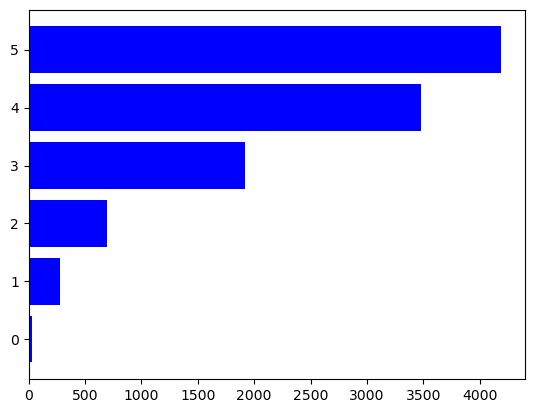

In [569]:
plt.barh(list(range(len(summDF.iloc[i]))), list(summDF.iloc[i].sort_values(ascending=True).values),color ='blue')
plt.savefig('tmp_plt.png', bbox_inches='tight')

img = "tmp_plt.png"
left, top, width, height = Inches(1), Inches(1.5), Inches(5), Inches(5)
pic = FE_slide.shapes.add_picture(img, left, top, width, height)

In [570]:
prs.save(outPath+'tmp_test.pptx')